In [148]:
import pandas as pd
import numpy as np

In [149]:
df = pd.read_csv("Cars.csv")

In [150]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [151]:
X = df.drop("Sell Price($)", axis=1)
y = df["Sell Price($)"]

In [152]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [153]:
encoding = pd.get_dummies(df["Car Model"])
encoding

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [154]:
data = pd.concat([df, encoding], axis=1)

In [155]:
data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [156]:
data = data.drop(columns=["Car Model", "Mercedez Benz C class"])

In [157]:
data

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [158]:
X, y = data.drop("Sell Price($)", axis=1), data["Sell Price($)"]
print(X)
y

    Mileage  Age(yrs)  Audi A5  BMW X5
0     69000         6        0       1
1     35000         3        0       1
2     57000         5        0       1
3     22500         2        0       1
4     46000         4        0       1
5     59000         5        1       0
6     52000         5        1       0
7     72000         6        1       0
8     91000         8        1       0
9     67000         6        0       0
10    83000         7        0       0
11    79000         7        0       0
12    59000         5        0       0


0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

<AxesSubplot: xlabel='Mileage', ylabel='Sell Price($)'>

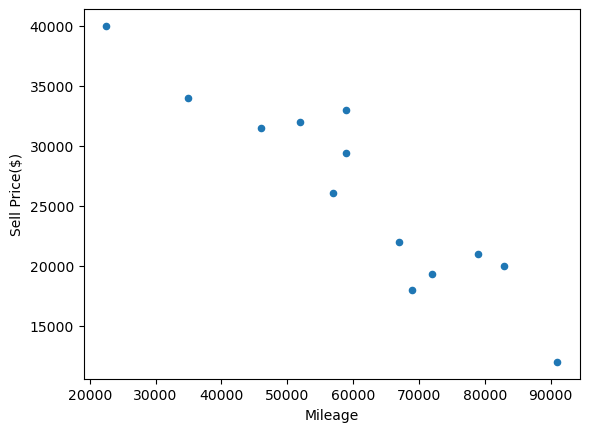

In [159]:
data.plot.scatter(x="Mileage", y="Sell Price($)")

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [161]:
model = LinearRegression()

In [182]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), 
                                                    np.array(y),
                                                    random_state=42,
                                                    test_size=0.5)

In [183]:
model.fit(np.array(X_train), np.array(y_train))

LinearRegression()

In [184]:
# Prediction of price of mercedes benz that is 4 yr old woth mileage 45000
model.predict([[45000, 4, 0, 0]])

array([39286.11242324])

In [185]:
# Predict price of BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000, 7, 0, 1]])

array([10407.46339159])

In [186]:
# Accuracy of model
model.score(X_test, y_test)

0.6810279108787294

In [187]:
X_test

array([[79000,     7,     0,     0],
       [67000,     6,     0,     0],
       [69000,     6,     0,     1],
       [91000,     8,     1,     0],
       [59000,     5,     1,     0],
       [57000,     5,     0,     1],
       [35000,     3,     0,     1]], dtype=int64)

In [188]:
y_test

array([21000, 22000, 18000, 12000, 29400, 26100, 34000], dtype=int64)

In [189]:
model.predict([[79000, 7, 0 , 0]])

array([24700.70854983])

In [190]:
model.predict([[67000, 6, 0 , 0]])

array([30175.01180916])

In [191]:
model.predict([[69000, 6, 0 , 1]])

array([20475.53141238])